In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
hero_names = [u'adagio',
 u'ardan',
 u'vox',
 u'krul',
 u'celeste',
 u'ringo',
 u'catherine',
 u'skaarf',
 u'koshka',
 u'taka',
 u'petal',
 u'rona',
 u'glaive',
 u'saw',
 u'joule',
 u'fortress']

In [3]:
def build_game(row_player_file, col_player_file):
    """Import the bi matrices and create the game object"""
    bi_matrices = []
    for fle in [row_player_file, col_player_file]:
        f = open(fle, 'r')
        csvrdr = csv.reader(f)
        bi_matrices.append(-matrix([[float(ele) for ele in row] for row in csvrdr]))
        f.close()

    return NormalFormGame(bi_matrices)

In [24]:
g = build_game("data/A.csv", "data/B.csv")

Let us take a look at the payoff matrix:

In [25]:
m = g.payoff_matrices()[0].n(digits=0)
m

[ -1.0 -0.50 -0.19  -3.0  -1.0  -1.5  -4.0 -0.75  -3.0  -2.0  -2.0 -0.50  -3.0  -3.0  -2.0 -0.50]
[ -1.5  -2.0  -1.5  -4.0  -1.5  -2.0  -2.0  -3.0  -3.0  -3.0  -2.0 -0.50  -3.0  -4.0  -3.0  -1.5]
[ -3.0  -2.0  -3.0  -4.0  -3.0  -4.0  -1.5  -2.0  -6.0  -6.0  -2.0 -0.75  -3.0  -3.0  -2.0  -1.0]
[ -3.0  -2.0  -3.0  -4.0  -3.0  -4.0  -4.0  -4.0  -4.0  -6.0  -3.0  -1.0  -4.0  -4.0  -4.0  -1.5]
[ -1.5  -3.0  -2.0  -4.0  -3.0  -4.0  -4.0  -4.0  -8.0  -8.0  -4.0  0.00  -6.0  -3.0  -2.0  -2.0]
[ -2.0  -1.5 -0.75  -3.0  -2.0  -1.5  -4.0  -2.0  -4.0  -4.0  -4.0  0.00  -4.0  -3.0  -3.0 -0.38]
[ -3.0  -1.0 -0.50  -3.0  -1.0  -2.0  -2.0  -2.0  -2.0  -2.0  -4.0  -1.0  -3.0  -2.0  -2.0 -0.75]
[ -2.0  -1.0  -2.0  -4.0  -1.0  -4.0  -4.0  -2.0  -4.0  -8.0  -4.0  0.00  -6.0  -1.5  -2.0 -0.25]
[ -1.5 -0.38 -0.75  -4.0 -0.75  -2.0  -3.0  -1.0  -2.0  -2.0  -1.5 -0.19  -4.0  -1.5  -2.0 -0.12]
[ -4.0  0.00  0.00  -3.0  0.00  -1.5  -6.0  -1.0  -3.0  -4.0  -2.0  0.00  -3.0  -4.0  -4.0  0.00]
[ -2.0  -1.5  -1.5  

In [34]:
sum_of_threats = [sum([row[k] for row in m])  for k in range(16)]
[hero_names[i] for i, score in enumerate(sum_of_threats) if score == min(sum_of_threats)]

[u'krul', u'catherine', u'koshka', u'taka', u'glaive']

In [12]:
[(i,k) for i,k in enumerate(map(sum, g.payoff_matrices()[0].n(digits=0)))]

[(0, -16.),
 (1, -16.),
 (2, -32.),
 (3, -32.),
 (4, -32.),
 (5, -16.),
 (6, -16.),
 (7, -32.),
 (8, -16.),
 (9, -16.),
 (10, -16.),
 (11, -16.),
 (12, -16.),
 (13, -16.),
 (14, -32.),
 (15, -16.)]

Here is a graphical representation of this for the row player:

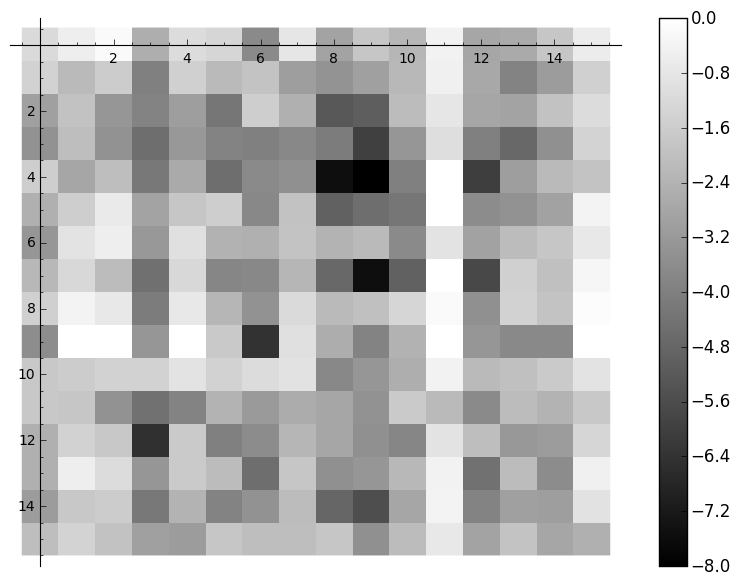

In [95]:
plot(g.payoff_matrices()[0], colorbar=True)

Here is the same for the column player (as expected these are just reflections of each other in the diagonal):

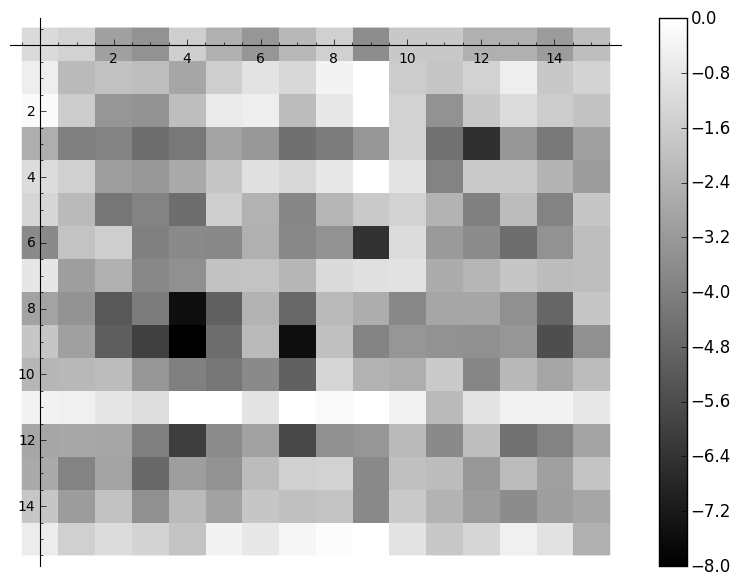

In [96]:
plot(g.payoff_matrices()[1], colorbar=True)

Check if the game is degenerate:

In [97]:
g.is_degenerate()

True

Let us find the best responses to each player.

In [98]:
def get_best_response_dictionary(game):
    """Returns the best response dictionary for a given player"""
    N = len(hero_names)
    best_response_dictionary = {}
    for i in range(1, N + 1):
        strategy = [0 for k in range(i - 1)] + [1] + [0 for k in range(N - i)]
        hero = hero_names[i - 1]
        best_responses = [hero_names[br] for br in g.best_responses(strategy,0)]
        best_response_dictionary[hero] = best_responses
    return best_response_dictionary

In [99]:
d = get_best_response_dictionary(g)
for hero in d:
    print hero +": " 
    for br in d[hero]:
        print "\t", br

adagio: 
	adagio
koshka: 
	fortress
ardan: 
	taka
joule: 
	petal
catherine: 
	petal
celeste: 
	taka
krul: 
	petal
ringo: 
	adagio
taka: 
	adagio
saw: 
	koshka
petal: 
	koshka
skaarf: 
	adagio
vox: 
	taka
rona: 
	celeste
	ringo
	skaarf
	taka
fortress: 
	taka
glaive: 
	glaive


Here is a graphical representation of the above:

In [100]:
def digraph_representation(game):
    """Get a graphical representation of the best response dynamics"""
    G = DiGraph(get_best_response_dictionary(game))
    return G

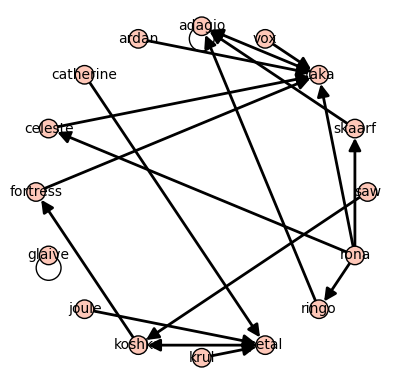

In [101]:
G = digraph_representation(g)
G.show(layout='circular')

Obtain the NE

In [102]:
NEs = g.obtain_nash(algorithm='lrs')

How many NE are there?

In [103]:
len(NEs)

13

In [104]:
def analyse_set_of_NE(NEs):
    """Go through the NEs and analyse"""
    
    return [sum([vector(ne[player])/len(NEs) for ne in NEs]) for player in [0, 1]]       

In [105]:
def plot_mean_NE(game, output_file, title=None):
    """Obtain the plot of the mean NE for a game: save to a file given by `output_file` also return the mean ne"""
    mean_ne = analyse_set_of_NE(NEs)

    N = len(hero_names)
    p1 = mean_ne[0]
    p2 = mean_ne[1]


    heroes = range(N)  # the x locations for the heroes
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(heroes, p1, width, color='black')
    rects2 = ax.bar([h + width for h in heroes], p2, width, color='grey')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Probability')
    if title:
        ax.set_title(title)
    else:
        ax.set_title('Mean probability for both players accross all equilibria')
    ax.set_xticks([h + width for h in heroes])
    ax.set_xticklabels(hero_names, rotation='vertical')
    plt.savefig(output_file, bbox_inches='tight')
    return mean_ne

In [106]:
mean_ne = plot_mean_NE(g, "risk-averse-plot-ne-all.svg", "Risk Averse - All guides")

Based on this not all heroes are actually played.

In [107]:
def heroes_that_are_played(mean_ne):
    return [hero_names[i] for i in range(len(hero_names)) if mean_ne[0][i] !=0]
def heroes_that_are_not_played(mean_ne):
    return [hero_names[i] for i in range(len(hero_names)) if mean_ne[0][i] ==0]

In [108]:
played = heroes_that_are_played(mean_ne)
played

[u'adagio', u'catherine', u'koshka', u'taka', u'petal', u'glaive', u'fortress']

In [109]:
not_played = heroes_that_are_not_played(mean_ne)
not_played

[u'ardan',
 u'vox',
 u'krul',
 u'celeste',
 u'ringo',
 u'skaarf',
 u'rona',
 u'saw',
 u'joule']

Let us redraw the best response dynamics indicating heroes that should (blue) and should not be played (red).

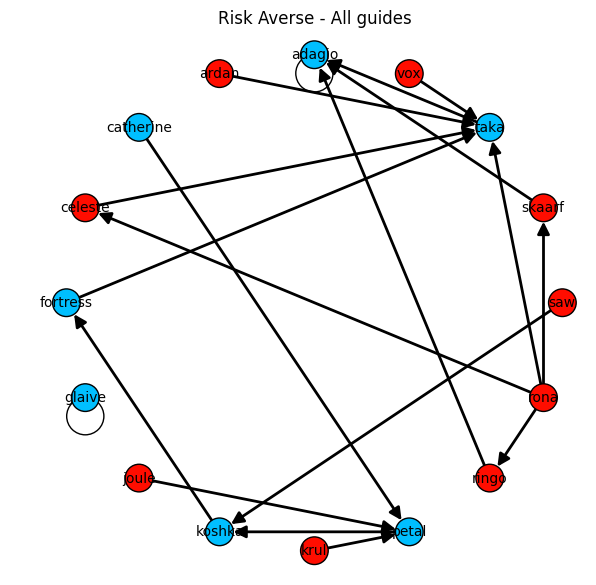

In [110]:
p = G.plot(layout='circular', vertex_colors={(0,.75,1):played, (1,.05,0):not_played}, title="Risk Averse - All guides")
p.save("risk-averse-plot-br-all.svg")
p

Analysing all the games.

In [111]:
N = 20
number_of_equilibria = []
for number_of_guides in range(1, N + 1):
    a_file = 'data/A-%02d.csv' % number_of_guides
    b_file = 'data/B-%02d.csv' % number_of_guides
    g = build_game(a_file, b_file)
    NEs = g.obtain_nash(algorithm='lrs')
    number_of_equilibria.append(len(NEs))
    mean_ne = plot_mean_NE(g, "risk-averse-plot-ne-%02d.svg" % number_of_guides, title="Risk Averse - %s guides" % number_of_guides)
    played = heroes_that_are_played(mean_ne)
    not_played = heroes_that_are_not_played(mean_ne)
    G = digraph_representation(g)
    p = G.plot(layout='circular', vertex_colors={(0,.75,1):played, (1,.05,0):not_played}, title="Risk Averse - %s guides" % number_of_guides)
    p.save("risk-averse-plot-br-%02d.svg"% number_of_guides)

In [112]:
number_of_equilibria

[35, 1352, 607, 3, 135, 479, 12, 30, 6, 6, 11, 5, 11, 13, 13, 5, 5, 5, 13, 13]

In [113]:
plt.figure()
plt.scatter(range(1, N + 1), number_of_equilibria)
#plt.ylim(0,max(number_of_equilibria) * 1.1)
plt.xlabel("Number of guides")
plt.ylabel("Number of equilibria (log scale)")
plt.yscale("log")
plt.title("Risk Averse")
plt.xlim(0, N + 1)
plt.savefig("risk-averse_number_of_equilibria.svg");

Swapping the and negating matrices so that players now aim to maximise the threat they pose.

In [114]:
a_file = 'A.csv'
b_file = 'B.csv'
g = build_game(b_file, a_file)
a, b = g.payoff_matrices()
g = NormalFormGame([-a, -b])
NEs = g.obtain_nash(algorithm='lrs')
number_of_equilibria.append(len(NEs))
mean_ne = plot_mean_NE(g, "threatening-plot-ne-all.svg", title="Threatening - All guides")
played = heroes_that_are_played(mean_ne)
not_played = heroes_that_are_not_played(mean_ne)
G = digraph_representation(g)
p = G.plot(layout='circular', vertex_colors={(0,.75,1):played, (1,.05,0):not_played}, title="Threatening - All guides")
p.save("threatening-plot-br-all.svg")

N = 20
number_of_equilibria = []
for number_of_guides in range(1, N + 1):
    a_file = 'A-%02d.csv' % number_of_guides
    b_file = 'B-%02d.csv' % number_of_guides
    g = build_game(b_file, a_file)
    a, b = g.payoff_matrices()
    g = NormalFormGame([-a, -b])
    NEs = g.obtain_nash(algorithm='lrs')
    number_of_equilibria.append(len(NEs))
    mean_ne = plot_mean_NE(g, "threatening-plot-ne-%02d.svg" % number_of_guides, title="Threatening - %s guides" % number_of_guides)
    played = heroes_that_are_played(mean_ne)
    not_played = heroes_that_are_not_played(mean_ne)
    G = digraph_representation(g)
    p = G.plot(layout='circular', vertex_colors={(0,.75,1):played, (1,.05,0):not_played}, title="Threatening - %s guides" % number_of_guides)
    p.save("threatening-plot-br-%02d.svg"% number_of_guides)

In [115]:
plt.figure()
plt.scatter(range(1, N + 1), number_of_equilibria)
#plt.ylim(0,max(number_of_equilibria) * 1.1)
plt.xlabel("Number of guides")
plt.ylabel("Number of equilibria (log scale)")
plt.title("Threatening")
plt.yscale("log")
plt.xlim(0, N + 1)
plt.savefig("threatening_number_of_equilibria.svg");

Consider the situation where the row player seeks to be a threat and the column player seeks to avoid threats

In [116]:
b_file = 'B.csv'
g = build_game(b_file, b_file)
a, b = g.payoff_matrices()
g = NormalFormGame([-a, b])
NEs = g.obtain_nash(algorithm='lrs')
number_of_equilibria.append(len(NEs))
mean_ne = plot_mean_NE(g, "asymmetric-plot-ne-all.svg", title="Asymmetric - All guides")

N = 20
number_of_equilibria = []
for number_of_guides in range(1, N + 1) :
    a_file = 'A-%02d.csv' % number_of_guides
    #b_file = 'B-%02d.csv' % number_of_guides
    g = build_game(a_file, a_file)
    a, b = g.payoff_matrices()
    g = NormalFormGame([-a, b])
    NEs = g.obtain_nash(algorithm='lrs')
    number_of_equilibria.append(len(NEs))
    mean_ne = plot_mean_NE(g, "asymmetric-plot-ne-%02d.svg" % number_of_guides, title="Asymmetric - %s guides" % number_of_guides)

In [117]:
plt.figure()
plt.scatter(range(1, N + 1), number_of_equilibria)
#plt.ylim(0,max(number_of_equilibria) * 1.1)
plt.xlabel("Number of guides")
plt.ylabel("Number of equilibria (log scale)")
plt.title("Asymmetric")
plt.yscale("log")
plt.xlim(0, N + 1)
plt.savefig("asymmetric_number_of_equilibria.svg");